In [409]:
%load_ext autoreload

%autoreload 2

import os
from glob import glob
import subprocess
import shutil
import traceback
import random
import pickle
from os.path import join

import joblib
from concurrent.futures import ProcessPoolExecutor

from backports import tempfile

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 144
matplotlib.rcParams["image.composite_image"]=False
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from numpy.fft import rfft, irfft, fft, ifft

import psrchive
import residuals

import pipe
from pipe import rotate_phase, convert_template, align_profile, align_scale_profile

plt.viridis()

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [872]:
template = "template-work/56736.85_AO_1400.profile.psrsmooth"
#template = "template-work/56070.64_AO_430.tscrunch.fscrunch.sm"
processing_name = "toa-testing-2"
#processing_name = "wideband"
toa_name = "normal"

In [873]:
#observation = "data/obs/56117.50_AO_1400"
#pipe.process_observation(observation, processing_name,
#                         work_dir="/tmp/triple-pipeline-test-6")
#pipe.process_observation(observation, processing_name,
#                         toa_bw=100, toa_time=60.)
#observation = "data/obs/56262.88_WSRT_1400"
#observation = "data/obs/56496.15_WSRT_1400"
#pipe.process_observation(observation, processing_name,
#                         toa_bw=100.,
#                         toa_time=600.)
#observation = "data/obs/56494.49_GBT_1400"
#pipe.process_observation(observation, processing_name)
#pipe.process_observation(observation, processing_name,
#                         toa_bw=100, toa_time=60.)
#observation = "data/obs/56070.64_AO_430"
#pipe.process_observation(observation, processing_name,
#                        toa_bw=100./8, toa_time=60.)
#observation = "data/obs/56479.20_WSRT_350"
#pipe.process_observation(observation, processing_name,
#                         toa_time=1200., toa_bw=30.)
observation = "data/obs/56768.79_AO_2000"
pipe.process_observation(observation, processing_name,
                         toa_bw=100, toa_time=60.)

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/raw_0000.ar'], {'output': '/data/archibald/scratch/triplegwGaFV/align_0000.ar', 'E': '/psr_archive/hessels/archibald/0337+17/ephemerides/56768.par', 'ephver': 'tempo'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/align_0000.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/raw_0000.ar with keyword output=/data/archibald/scratch/triplegwGaFV/align_0000.ar


/data/archibald/scratch/triplegwGaFV/align_0000.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/raw_0001.ar'], {'output': '/data/archibald/scratch/triplegwGaFV/align_0001.ar', 'E': '/psr_archive/hessels/archibald/0337+17/ephemerides/56768.par', 'ephver': 'tempo'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/align_0001.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/raw_0001.ar with keyword output=/data/archibald/scratch/triplegwGaFV/align_0001.ar


/data/archibald/scratch/triplegwGaFV/align_0001.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/raw_0002.ar'], {'output': '/data/archibald/scratch/triplegwGaFV/align_0002.ar', 'E': '/psr_archive/hessels/archibald/0337+17/ephemerides/56768.par', 'ephver': 'tempo'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/align_0002.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/raw_0002.ar with keyword output=/data/archibald/scratch/triplegwGaFV/align_0002.ar
INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/raw_0003.ar'], {'output': '/data/archibald/scratch/triplegwGaFV/align_0003.ar', 'E': '/psr_archive/hessels/archibald/0337+17/ephemerides/56768.par', 'ephver': 'tempo'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/align_0003.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/raw_0003.ar with 

/data/archibald/scratch/triplegwGaFV/align_0002.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/raw_0004.ar'], {'output': '/data/archibald/scratch/triplegwGaFV/align_0004.ar', 'E': '/psr_archive/hessels/archibald/0337+17/ephemerides/56768.par', 'ephver': 'tempo'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/align_0004.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/raw_0004.ar with keyword output=/data/archibald/scratch/triplegwGaFV/align_0004.ar


/data/archibald/scratch/triplegwGaFV/align_0003.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/raw_0005.ar'], {'output': '/data/archibald/scratch/triplegwGaFV/align_0005.ar', 'E': '/psr_archive/hessels/archibald/0337+17/ephemerides/56768.par', 'ephver': 'tempo'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/align_0005.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/raw_0005.ar with keyword output=/data/archibald/scratch/triplegwGaFV/align_0005.ar


/data/archibald/scratch/triplegwGaFV/align_0004.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/raw_0006.ar'], {'output': '/data/archibald/scratch/triplegwGaFV/align_0006.ar', 'E': '/psr_archive/hessels/archibald/0337+17/ephemerides/56768.par', 'ephver': 'tempo'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/align_0006.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/raw_0006.ar with keyword output=/data/archibald/scratch/triplegwGaFV/align_0006.ar


/data/archibald/scratch/triplegwGaFV/align_0005.ar written to disk
/data/archibald/scratch/triplegwGaFV/align_0006.ar written to disk


INFO:root:Zapping ['/data/archibald/scratch/triplegwGaFV/cal_0000.ar', '/data/archibald/scratch/triplegwGaFV/cal_0001.ar', '/data/archibald/scratch/triplegwGaFV/cal_0002.ar', '/data/archibald/scratch/triplegwGaFV/cal_0003.ar', '/data/archibald/scratch/triplegwGaFV/cal_0004.ar', '/data/archibald/scratch/triplegwGaFV/cal_0005.ar', '/data/archibald/scratch/triplegwGaFV/cal_0006.ar']
INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/cal_0000.ar', '-F', '1600 1770', '-F', '1880 2050', '-F', '2100 2160', '-F', '2400 2600'], {'output': '/data/archibald/scratch/triplegwGaFV/zaptemp_0000.ar', 'R': 20, 'r': None}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/zaptemp_0000.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/cal_0000.ar with keyword output=/data/archibald/scratch/triplegwGaFV/zaptemp_0000.ar


Using median smoothed difference zapper
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 146 147 154 155 162 170 171 178 182 186 194 195 210 211 218 219 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 146 147 154 155 162 170 171 178 182 186 194 195 210 211 218 219 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 210 211 218 219 222 226 227

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/cal_0001.ar', '-F', '1600 1770', '-F', '1880 2050', '-F', '2100 2160', '-F', '2400 2600'], {'output': '/data/archibald/scratch/triplegwGaFV/zaptemp_0001.ar', 'R': 20, 'r': None}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/zaptemp_0001.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/cal_0001.ar with keyword output=/data/archibald/scratch/triplegwGaFV/zaptemp_0001.ar


Using median smoothed difference zapper
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 202 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 146 147 154 155 162 170 171 178 182 186 194 195 210 211 218 219 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 146 147 154 155 162 170 171 178 182 186 194 195 210 211 218 219 226

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/cal_0002.ar', '-F', '1600 1770', '-F', '1880 2050', '-F', '2100 2160', '-F', '2400 2600'], {'output': '/data/archibald/scratch/triplegwGaFV/zaptemp_0002.ar', 'R': 20, 'r': None}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/zaptemp_0002.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/cal_0002.ar with keyword output=/data/archibald/scratch/triplegwGaFV/zaptemp_0002.ar


Using median smoothed difference zapper
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 202 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 146 147 154 155 162 170 171 178 182 186 194 195 210 211 218 219 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 146 147 154 155 162 170 171 178 182 186 187 194 195 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 143 144 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 202 210 211

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/cal_0003.ar', '-F', '1600 1770', '-F', '1880 2050', '-F', '2100 2160', '-F', '2400 2600'], {'output': '/data/archibald/scratch/triplegwGaFV/zaptemp_0003.ar', 'R': 20, 'r': None}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/zaptemp_0003.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/cal_0003.ar with keyword output=/data/archibald/scratch/triplegwGaFV/zaptemp_0003.ar


Using median smoothed difference zapper
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 202 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 202 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 1

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/cal_0004.ar', '-F', '1600 1770', '-F', '1880 2050', '-F', '2100 2160', '-F', '2400 2600'], {'output': '/data/archibald/scratch/triplegwGaFV/zaptemp_0004.ar', 'R': 20, 'r': None}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/zaptemp_0004.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/cal_0004.ar with keyword output=/data/archibald/scratch/triplegwGaFV/zaptemp_0004.ar


Using median smoothed difference zapper
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 170 171 178 182 183 186 187 194 195 198 199 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 146 147 154 155 162 170 171 178 182 186 194 195 210 211 218 219 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 146 147 154 155 162 170 171 178 182 186 194 195 210 211 218 219 226 227

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/cal_0005.ar', '-F', '1600 1770', '-F', '1880 2050', '-F', '2100 2160', '-F', '2400 2600'], {'output': '/data/archibald/scratch/triplegwGaFV/zaptemp_0005.ar', 'R': 20, 'r': None}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/zaptemp_0005.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/cal_0005.ar with keyword output=/data/archibald/scratch/triplegwGaFV/zaptemp_0005.ar


Using median smoothed difference zapper
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 56 57 144 145 146 147 154 155 162 164 170 171 178 179 182 183 186 187 194 195 198 199 202 210 211 218 219 222 223 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 57 143 144 145 146 147 154 155 162 170 171 178 179 182 183 186 187 194 195 198 199 202 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 56 57 143 144 145 146 147 154 155 162 164 170 171 178 179 182 183 186 187 194 195 198 199 202 210 211 218 219 222 223 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/cal_0006.ar', '-F', '1600 1770', '-F', '1880 2050', '-F', '2100 2160', '-F', '2400 2600'], {'output': '/data/archibald/scratch/triplegwGaFV/zaptemp_0006.ar', 'R': 20, 'r': None}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/zaptemp_0006.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/cal_0006.ar with keyword output=/data/archibald/scratch/triplegwGaFV/zaptemp_0006.ar


Using median smoothed difference zapper
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 56 57 140 141 142 143 144 145 146 147 154 155 162 164 170 171 178 179 182 183 186 187 194 195 198 199 202 210 211 218 219 222 223 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 142 146 147 154 155 162 170 171 178 182 186 194 195 210 211 218 219 222 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 20 21 56 57 141 142 143 144 145 146 147 154 155 162 164 170 171 178 179 182 183 186 187 194 195 198 199 200 202 210 211 218 219 222 223 226 227 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 19 2

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/zap_0000.ar'], {'setnchn': 4, 'output': '/data/archibald/scratch/triplegwGaFV/scrunchtemp_0000.ar'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/scrunchtemp_0000.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/zap_0000.ar with keyword output=/data/archibald/scratch/triplegwGaFV/scrunchtemp_0000.ar
INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/zap_0001.ar'], {'setnchn': 4, 'output': '/data/archibald/scratch/triplegwGaFV/scrunchtemp_0001.ar'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/scrunchtemp_0001.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/zap_0001.ar with keyword output=/data/archibald/scratch/triplegwGaFV/scrunchtemp_0001.ar


/data/archibald/scratch/triplegwGaFV/scrunchtemp_0000.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/zap_0002.ar'], {'setnchn': 4, 'output': '/data/archibald/scratch/triplegwGaFV/scrunchtemp_0002.ar'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/scrunchtemp_0002.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/zap_0002.ar with keyword output=/data/archibald/scratch/triplegwGaFV/scrunchtemp_0002.ar


/data/archibald/scratch/triplegwGaFV/scrunchtemp_0001.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/zap_0003.ar'], {'setnchn': 4, 'output': '/data/archibald/scratch/triplegwGaFV/scrunchtemp_0003.ar'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/scrunchtemp_0003.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/zap_0003.ar with keyword output=/data/archibald/scratch/triplegwGaFV/scrunchtemp_0003.ar


/data/archibald/scratch/triplegwGaFV/scrunchtemp_0002.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/zap_0004.ar'], {'setnchn': 4, 'output': '/data/archibald/scratch/triplegwGaFV/scrunchtemp_0004.ar'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/scrunchtemp_0004.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/zap_0004.ar with keyword output=/data/archibald/scratch/triplegwGaFV/scrunchtemp_0004.ar


/data/archibald/scratch/triplegwGaFV/scrunchtemp_0003.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/zap_0005.ar'], {'setnchn': 4, 'output': '/data/archibald/scratch/triplegwGaFV/scrunchtemp_0005.ar'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/scrunchtemp_0005.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/zap_0005.ar with keyword output=/data/archibald/scratch/triplegwGaFV/scrunchtemp_0005.ar


/data/archibald/scratch/triplegwGaFV/scrunchtemp_0004.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/zap_0006.ar'], {'setnchn': 4, 'output': '/data/archibald/scratch/triplegwGaFV/scrunchtemp_0006.ar'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/scrunchtemp_0006.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/zap_0006.ar with keyword output=/data/archibald/scratch/triplegwGaFV/scrunchtemp_0006.ar


/data/archibald/scratch/triplegwGaFV/scrunchtemp_0005.ar written to disk
/data/archibald/scratch/triplegwGaFV/scrunchtemp_0006.ar written to disk


ERROR:root:Metadata claims 63 subints but files contain 447 for observation 56768.79_AO_2000; overriding
INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triplegwGaFV/scrunchadd_0000.ar'], {'output': '/data/archibald/scratch/triplegwGaFV/scrunch_0000.ar', 'setnsub': 77.0}) != ([], {})
INFO:root:Output /data/archibald/scratch/triplegwGaFV/scrunch_0000.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triplegwGaFV/scrunchadd_0000.ar with keyword output=/data/archibald/scratch/triplegwGaFV/scrunch_0000.ar
DEBUG:root:Scrunch requested 4 channels from 256 got 4
DEBUG:root:Scrunch requested 77 subints from 447 got 75


/data/archibald/scratch/triplegwGaFV/scrunch_0000.ar written to disk


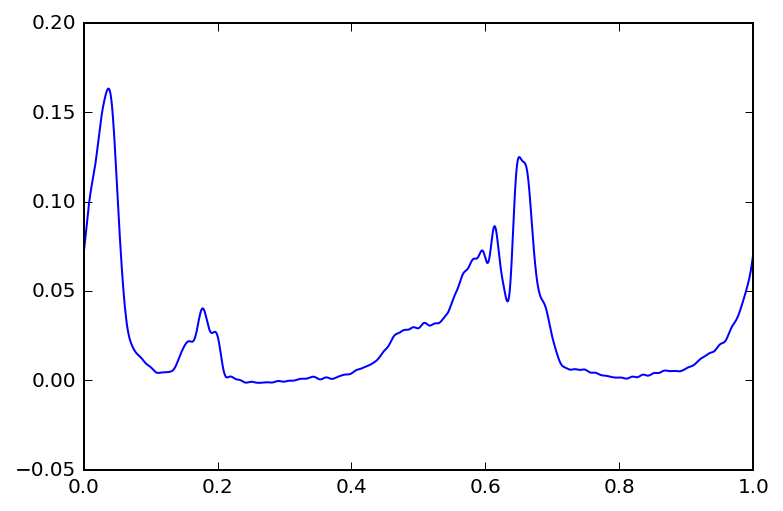

In [874]:
T = psrchive.Archive_load(template)
T.dedisperse()
T.pscrunch()
T.remove_baseline()
t_values = T.get_data()[0,0,0,:]
t_phases = np.linspace(0,1,len(t_values),endpoint=False)
plt.plot(t_phases,t_values)

In [875]:
with open(join(observation,"meta.pickle"),"rb") as f:
    meta = pickle.load(f)
print meta["tstart"], meta["mjd"], meta["tend"]
with open(join(observation,processing_name,"process.pickle"),"rb") as f:
    meta = pickle.load(f)
print meta["tstart"], meta["mjd"], meta["tend"]
print meta["bw"]

56768.7588985 56768.7853857 56768.8118729
56768.7588985 56768.7853857 56768.8118729
-400.0


data/obs/56768.79_AO_2000/toa-testing-2/scrunch_0000.ar
/psr_archive/hessels/archibald/0337+17/ephemerides/56768.par
225 225


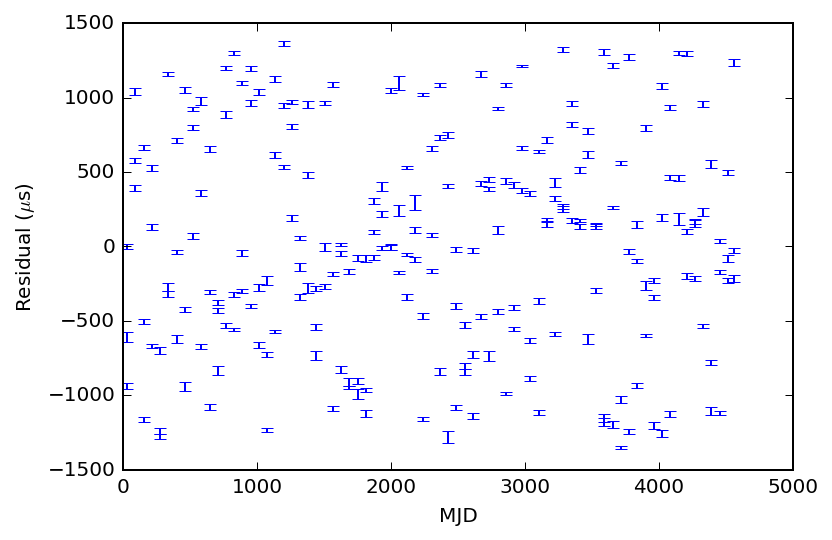

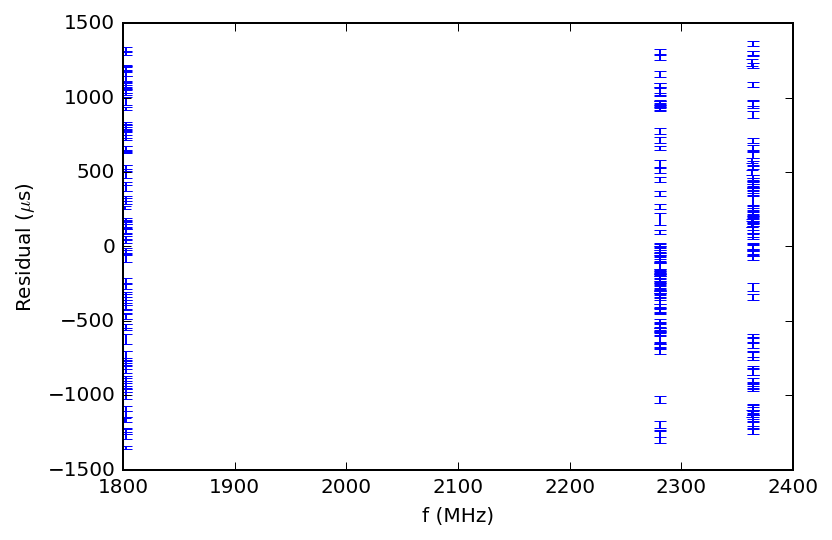

In [876]:
sf, = sorted(glob(join(observation,processing_name,"scrunch_*.ar")))
print sf

pat_output = subprocess.check_output(["pat", 
                             "-s", template,
                             "-f", "tempo2 IPTA",
                             sf])

topo_toa = []
toa_info = []
for l in pat_output.split("\n"):
    if not l or l.startswith("FORMAT"):
        continue
    ls = l.split()
    mjd = float(ls[2])
    #print mjd, l
    topo_toa.append(mjd)
    d = dict(mjd_string=ls[2],
             mjd=mjd,
             file=ls[0],
             freq=float(ls[1]),
             uncert=float(ls[3]),
             tel=ls[4],
             flags=dict())
    for k, v in zip(ls[5::2],ls[6::2]):
        if not k.startswith("-"):
            raise ValueError("Mystery flag: %s %s" % (k,v))
        d["flags"][k[1:]] = v
    if (len(ls)-5) % 2:
        raise ValueError("Apparently improper number of flags: %d in %s" % (len(ls),ls))
    toa_info.append(d)
topo_toa = np.array(topo_toa)
    
with tempfile.TemporaryDirectory("triple") as td:
    tim = join(td,"toas.tim")
    with open(tim,"wt") as f:
        f.write(pat_output)
    par = pipe.par_db.get_par_for(meta["mjd"])
    print par
    subprocess.check_call(["tempo", "-f", par, tim],
                          cwd=td)
    resid2 = residuals.read_residuals(join(td,"resid2.tmp"))
    plt.errorbar((topo_toa-meta["tstart"])*86400, 1e6*resid2.prefit_sec, 1e6*resid2.uncertainty,
                linestyle="none")
    plt.xlabel("MJD")
    plt.ylabel("Residual ($\mu$s)")
    plt.figure()
    plt.errorbar(resid2.bary_freq, 1e6*resid2.prefit_sec, 1e6*resid2.uncertainty,
                linestyle="none")
    plt.xlabel("f (MHz)")
    plt.ylabel("Residual ($\mu$s)")
    #plt.xlim(min_f, max_f)
    meta["rms_residual"] = 1e6*np.std(resid2.prefit_sec)
    meta["mean_residual_uncertainty"] = 1e6*np.mean(resid2.uncertainty)
    mr = np.average(resid2.prefit_sec, weights=1/resid2.uncertainty)
    meta["reduced_chi2"] = np.sqrt(np.mean(((resid2.prefit_sec-mr)/resid2.uncertainty)**2))
print len(resid2.bary_TOA), len(topo_toa)

In [877]:
print pat_output

FORMAT 1
data/obs/56768.79_AO_2000/toa-testing-2/scrunch_0000.ar 2363.959229 56768.759253446267923  14.126  ao  -fe sbw -be PUPPI -f sbw_PUPPI -bw 100 -tobs 61.497 -tmplt template-work/56736.85_AO_1400.profile.psrsmooth -nbin 2048 -nch 64
data/obs/56768.79_AO_2000/toa-testing-2/scrunch_0000.ar 2280.781250 56768.759253452830364  34.027  ao  -fe sbw -be PUPPI -f sbw_PUPPI -bw 100 -tobs 61.497 -tmplt template-work/56736.85_AO_1400.profile.psrsmooth -nbin 2048 -nch 64
data/obs/56768.79_AO_2000/toa-testing-2/scrunch_0000.ar 1802.567627 56768.759253440755357  19.242  ao  -fe sbw -be PUPPI -f sbw_PUPPI -bw 100 -tobs 61.497 -tmplt template-work/56736.85_AO_1400.profile.psrsmooth -nbin 2048 -nch 64
data/obs/56768.79_AO_2000/toa-testing-2/scrunch_0000.ar 2363.774902 56768.759965001062464  18.864  ao  -fe sbw -be PUPPI -f sbw_PUPPI -bw 100 -tobs 61.497 -tmplt template-work/56736.85_AO_1400.profile.psrsmooth -nbin 2048 -nch 64
data/obs/56768.79_AO_2000/toa-testing-2/scrunch_0000.ar 2280.781250 567

In [878]:
if "raw_smearing" in meta:
    plt.plot(meta["raw_smearing"][0], label="raw smearing")
    plt.plot(meta["smearing"][0], label="smearing")
    plt.legend(loc="best")
    plt.ylabel("Turns")
    plt.xlabel("subintegration")

In [879]:
meta["processing_name"] = processing_name
meta["template"] = os.path.basename(template)
meta["toa_name"] = toa_name

In [880]:
text_format = """PSR J0337+1715 observation {name}
Observed: {tel} {receiver} Processing: {processing_name} 
Template: {template} TOAs: {toa_name}
Center frequency: {centre_frequency:.1f} MHz
Length: {length:.1f} s Bandwidth: {bw:.1f} MHz
Maximum smearing: {max_smearing:.2f} $\mu$s
Signal-to-noise ratio overall: {overall_snr:.1f} Average: {average_snr:.1f}
RMS residual: {rms_residual:.2f} $\mu$s
Mean residual uncertainty: {mean_residual_uncertainty:.2f} $\mu$s
Residual reduced $\chi^2$: {reduced_chi2:.2f}
"""

In [885]:
p_dir = join(observation,processing_name)
print p_dir
scrunched = sorted(glob(join(p_dir, "scrunch_*.ar")))

T = psrchive.Archive_load(template)
T.dedisperse()
T.pscrunch()
T.remove_baseline()
t_values = convert_template(T.get_data()[0,0,0,:], meta["nbin"])
t_phases = np.linspace(0,1,len(t_values),endpoint=False)

snr_sum = 0
snr_weight = 0
snr_data = []

min_f = meta["centre_frequency"]-meta["bw"]/2
max_f = meta["centre_frequency"]+meta["bw"]/2
if min_f>max_f:
    min_f, max_f = max_f, min_f

for s in scrunched:
    F = psrchive.Archive_load(s)
    F.pscrunch()
    F.dedisperse()
    F.remove_baseline()
    # subint, chan, bin
    d = F.get_data()[:,0,:,:]
    w = F.get_weights()
    ns, nc, nb = d.shape
    snrs = np.ma.zeros((ns,nc))
    toa_by_index = {}
    subix = []
    for i in range(len(F)):
        I = F.get_Integration(i)
        subix.append(I.get_start_time().in_days())
    subix.append(I.get_end_time().in_days())
    subix = np.array(subix)
    chix = np.linspace(min_f, max_f, nc+1)
    for t in toa_info:
        i = np.searchsorted(subix,t["mjd"])-1
        j = np.searchsorted(chix,t["freq"])-1
        if meta["bw"] < 0:
            j = nc-1-j
        #print t["mjd"], t["freq"], i, j, min_f, max_f
        if (i,j) in toa_by_index:
            raise ValueError("Problem matching TOAs with subintegrations for %s" % t)
        toa_by_index[i,j] = t
    for i in range(ns):
        for j in range(nc):
            if w[i,j] == 0:
                snrs[i,j] = np.ma.masked
                continue
            prof_ = d[i,j]
            phase, amp, bg = align_scale_profile(t_values, prof_)
            t_fit = rotate_phase(t_values, phase)*amp + bg
            snrs[i,j] = np.sqrt(nb)*np.std(t_fit)/np.std(prof_-t_fit)
            if (i,j) in toa_by_index:
                toa_by_index[i,j]["flags"]["snr"] = snrs[i,j]
            else:
                raise ValueError("Missing TOA for unzapped subint (%d,%d)" % (i,j)) 
    ts = 0
    te = (F.end_time()-F.start_time()).in_days()*86400
    snr_data.append((ts,te,snrs))
    snr_sum += snrs.sum()
    snr_weight += snrs.count()
meta["average_snr"] = snr_sum/snr_weight

data/obs/56768.79_AO_2000/toa-testing-2


ValueError: Problem matching TOAs with subintegrations for {'mjd': 56768.75925345283, 'mjd_string': '56768.759253452830364', 'tel': 'ao', 'uncert': 34.027, 'file': 'data/obs/56768.79_AO_2000/toa-testing-2/scrunch_0000.ar', 'flags': {'be': 'PUPPI', 'tobs': '61.497', 'f': 'sbw_PUPPI', 'nch': '64', 'bw': '100', 'fe': 'sbw', 'nbin': '2048', 'tmplt': 'template-work/56736.85_AO_1400.profile.psrsmooth'}, 'freq': 2280.78125}

In [ ]:
unscrunched = sorted(glob(join(p_dir, "zap_*.ar")))

gtp_data = None
gtp_weight = None
prof_data = None
prof_weight = None
std_data = None
std_weight = None

yfp_data = []
yfp_start_end = []

smear_data = []

for (i,u) in enumerate(unscrunched):    
    F = psrchive.Archive_load(u)
    F.convert_state('Stokes')
    F.dedisperse()
    F.remove_baseline()
    # axes are (subint, polarization, channel, bin)
    d = F.get_data()
    # axes are (subint, channel)
    w = F.get_weights()
    
    sm = meta["smearing"][i].copy()
    if "raw_smearing" in meta:
        sm += meta["raw_smearing"][i]
    sm_xs = np.linspace((F.start_time().in_days()-meta["tstart"])*86400,
                        (F.end_time().in_days()-meta["tstart"])*86400,
                        len(F)+1)[1:-1]
    smear_data.append((sm_xs,sm))
    if "max_smearing" not in meta:
        meta["max_smearing"] = 0
    meta["max_smearing"] = max(meta["max_smearing"],
                               np.amax(np.abs(sm))*1e6*meta["P"])
    
    # Profile
    sd, sw = np.ma.average(d, weights=w[:,None,:,None]+0*d, axis=2, returned=True)
    sd, sw = np.ma.average(sd, weights=sw, axis=0, returned=True)
    if prof_data is None:
        prof_data, prof_weights = sd, sw
    else:
        prof_data = (prof_data*prof_weights+sd*sw)/(prof_weights+sw)
        prof_weights += sw
    
    # Noise std. dev per bin (pre-averaging)
    sd = np.std(d[:,0,:,:], axis=-1)
    sd, sw = np.ma.average(sd,weights=w,returned=True)
    if std_data is None:
        std_data, std_weight = sd, sw
    else:
        std_data = (std_data*std_weight+sd*sw)/(std_weight+sw)
        std_weight += sw
    
    # GTp plot
    sd, sw = np.ma.average(d[:,0], weights=w[...,None]+0*d[:,0], axis=0, returned=True)
    if gtp_data is None:
        gtp_data, gtp_weights = sd, sw
    else:
        gtp_data = (gtp_data*gtp_weights+sd*sw)/(gtp_weights+sw)
        gtp_weights += sw
        
    # YFp plot
    yd, yw = np.ma.average(d[:,0], weights=w[...,None]+0*d[:,0], axis=1, returned=True)
    yd = np.ma.array(yd)
    yd[yw==0] = np.ma.masked
    b = (F.start_time().in_days()-meta["tstart"])*86400
    e = (F.end_time().in_days()-meta["tstart"])*86400
    yfp_data.append(yd)
    yfp_start_end.append((b,e))
gtp_data = np.ma.array(gtp_data)
gtp_data[gtp_weights==0] = np.ma.masked

phase, amp, bg = align_scale_profile(t_values, prof_data[0])
t_fit = rotate_phase(t_values, phase)*amp + bg
meta["overall_snr"] = np.sqrt(nb)*np.std(t_fit)/np.std(prof_data[0]-t_fit)

In [ ]:
meta["summary"] = text_format.format(**meta)
print meta["summary"]


In [ ]:
# Weird that these are different.
for (b1,e1),(b2,e2) in zip(yfp_start_end[:-1], yfp_start_end[1:]):
    print e1, b2-e1

In [ ]:
tdir = join(p_dir,meta["toa_name"])
if not os.path.exists(tdir):
    os.makedirs(tdir)
with open(join(tdir,"toas.tim"),"wt") as of:
    of.write("FORMAT 1\n")
    for t in toa_info:
        if "nch" in t["flags"]:
            del t["flags"]["nch"]
        for f in ["processing_name", "max_smearing", "band", "tel", "toa_name"]:
            t["flags"][f] = meta[f]

        flagpart = " ".join("-"+k+" "+str(v) for k,v in t["flags"].items())
        t["flagpart"] = flagpart
        l = "{file} {freq} {mjd_string} {uncert} {tel} {flagpart}".format(**t)
        of.write(l)
        print l
        of.write("\n")
with open(join(tdir,"toas.pickle"),"wt") as of:
    meta["toas"] = toa_info
    pickle.dump(meta, of)

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,8)

lm = 0.085
prof = plt.axes((lm,0.70,0.4,0.25))
resid = plt.axes((lm,0.55,0.4,0.15))
gtp = plt.axes((lm,0.30,0.4,0.25))
yfp = plt.axes((lm,0.05,0.4,0.25))
text_x, text_y = 0.50, 0.95

cbar = plt.axes((0.80,0.70,0.15,0.03))
snr = plt.axes((0.55,0.55,0.4,0.15))
smear = plt.axes((0.55,0.40,0.4,0.15))
resid_t = plt.axes((0.55,0.25,0.4,0.15))
resid_f = plt.axes((0.55,0.05,0.4,0.15))

tend = (meta["tend"]-meta["tstart"])*86400

plt.sca(resid_t)
plt.errorbar((topo_toa-meta["tstart"])*86400, 1e6*resid2.prefit_sec, 1e6*resid2.uncertainty,
                linestyle="none", fmt="k.")
plt.xlabel("t (s)")
plt.ylabel("Residual ($\mu$s)")

plt.sca(resid_f)
plt.errorbar(resid2.bary_freq, 1e6*resid2.prefit_sec, 1e6*resid2.uncertainty,
            linestyle="none", fmt="k.")
plt.xlabel("f (MHz)")
plt.ylabel("Residual ($\mu$s)")

plt.sca(snr)
for ts, te, snrs in snr_data:
    if meta["bw"]>0:
        snrs = snrs[:,::-1]
    plt.imshow(snrs.T, extent=(ts, te, min_f, max_f),
          interpolation='nearest')
snr.set_aspect('auto')
plt.ylabel("f (MHz)")
plt.sca(resid_t)
plt.xlim(0,tend)
plt.sca(snr)
plt.tick_params(axis='x', labelbottom='off')
plt.xlim(0,tend)
cb = plt.colorbar(cax=cbar, orientation='horizontal', label="S/N")
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
plt.sca(smear)
plt.tick_params(axis='x', labelbottom='off')
plt.xlim(0,tend)
plt.ylabel("Smearing ($\mu$s)")

plt.sca(yfp)
#for (yd, (b,e)) in zip(yfp_data, yfp_start_end):
#    plt.imshow(yd[::-1,:],extent=(0,1,b,e),
#          interpolation='none')
yd = np.ma.concatenate(yfp_data)
b = yfp_start_end[0][0]
e = yfp_start_end[-1][1]
n, x = np.percentile(np.ma.compressed(yd),[1,99])
plt.imshow(yd[::-1,:],extent=(0,1,b,e),
           vmin=n, vmax=x,
      interpolation='none')
    
plt.sca(smear)
for (sm_xs, sm) in smear_data:
    plt.plot(sm_xs, sm*1e6*meta["P"], color='k')


plt.sca(prof)
ps = np.linspace(0,1,prof_data.shape[1],endpoint=False)
plt.plot(ps,prof_data[0,:], color='black')
plt.plot(ps,prof_data[3,:], color='blue')
plt.plot(ps,np.hypot(prof_data[1,:],prof_data[2,:]), color='red')
plt.plot(ps, t_fit, color='green')
#plt.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
plt.tick_params(axis='x', labelbottom='off')
plt.ylabel("Flux density (Jy?)")
p_x = ps[np.argmax(t_fit)]
vline_alpha = 0.5
vline_color = 'purple'
plt.axvline(p_x, color=vline_color, alpha=vline_alpha)
plt.xlim(0,1)

plt.sca(resid)
plt.plot(ps,prof_data[0,:]-t_fit, color='black')
plt.ylabel(r"$\Delta$Flux")
plt.tick_params(axis='x', labelbottom='off')
plt.axvline(p_x, color=vline_color, alpha=vline_alpha)
plt.xlim(0,1)

plt.sca(gtp)
if meta["bw"]<0:
    gtp_data_display = gtp_data[::-1,:]
else:
    gtp_data_display = gtp_data
n, x = np.percentile(np.ma.compressed(gtp_data),[1,99])
plt.imshow(gtp_data_display[::-1,:], extent=(0,1,min_f,max_f),
           vmin=n, vmax=x,
          interpolation='none')
gtp.set_aspect("auto")
plt.ylabel("freq (MHz)")
plt.tick_params(axis='x', labelbottom='off')
plt.axvline(p_x, color=vline_color, alpha=vline_alpha)
plt.xlim(0,1)

plt.sca(yfp)
yfp.set_aspect("auto")
plt.xlabel("pulse phase")
plt.ylabel("time (s)")
plt.axvline(p_x, color=vline_color, alpha=vline_alpha)
plt.xlim(0,1)
plt.ylim(0,(meta["tend"]-meta["tstart"])*86400)

plt.sca(resid_f)
plt.xlim(min_f, max_f)

text = text_format.format(**meta)

print text
plt.text(text_x, text_y, text, 
         horizontalalignment="left", verticalalignment="top",
         transform=fig.transFigure)


plt.viridis()
plt.savefig(join(tdir,"summary.pdf"))

In [ ]:
tdir

In [ ]:
sorted(os.listdir(tdir))

In [ ]:
print open(join(tdir,"toas.tim")).read()